In [1]:
from __future__ import print_function

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
# try with a larger dataset and do plots!
data = pd.read_csv("A2_mosquito_data.csv")
print(data)

    year  temperature  rainfall  mosquitos
0   1960           82       200        180
1   1961           70       227        194
2   1962           89       231        207
3   1963           74       114        121
4   1964           78       147        140
5   1965           85       151        148
6   1966           86       172        162
7   1967           75       106        112
8   1968           70       276        230
9   1969           86       165        162
10  1970           83       222        198
11  1971           78       297        247
12  1972           87       288        248
13  1973           76       286        239
14  1974           86       231        202
15  1975           90       284        243
16  1976           76       190        175
17  1977           87       257        225
18  1978           88       128        133
19  1979           87       218        199
20  1980           81       206        184
21  1981           74       175        160
22  1982   

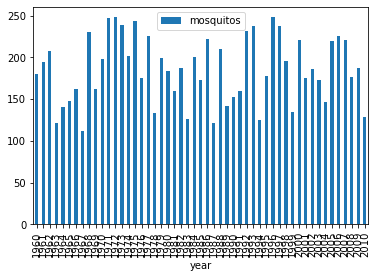

In [6]:
# try with bar plot of mosquitos against year
mosquitos_vs_year = data[['year','mosquitos']]
# mosquitos_vs_year.plot(kind='line')
# mosquitos_vs_year.plot(kind='line',x='year')
mosquitos_vs_year.plot(kind='bar',x='year')

Text(0.5, 1.0, 'Mosquitoes like water')

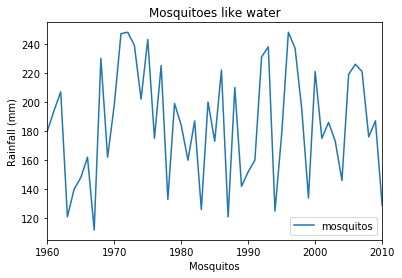

In [7]:
# try with line plots of mosquitos against year with manually added axis titles & plot title
mosquitos_vs_year.plot(kind='line',x='year')
plt.xlabel('Mosquitos')
plt.ylabel('Rainfall (mm)')
plt.title('Mosquitoes like water')

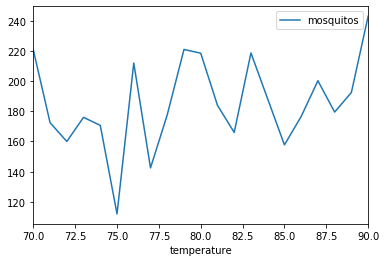

In [8]:
# try with grouping
# Let's group the data by temperature and then plot the mean number of mosquitoes for each temperature (to the nearest degree).
mosquito_data_only = data[['temperature','mosquitos']]
mosquito_data_only.groupby('temperature').mean().plot(kind='line')

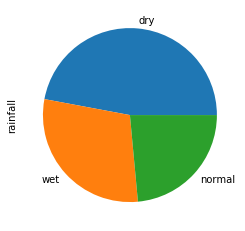

In [9]:
# Binning sorts data into intervals, or 'bins'.
bins = [0,200,250,300]
labels = ['dry','normal','wet']
pd.cut(data['rainfall'],bins,labels=labels).value_counts().plot(kind='pie')

In [10]:
# adding columns
data['temperature_celsius'] = (data['temperature']-32)*5/9.
data.head()

,year,temperature,rainfall,mosquitos,temperature_celsius
0,1960,82,200,180,27.777778
1,1961,70,227,194,21.111111
2,1962,89,231,207,31.666667
3,1963,74,114,121,23.333333
4,1964,78,147,140,25.555556


In [11]:
data.sort_values('temperature')
data.sort_values(['temperature','rainfall'])
data.sort_values('temperature',ascending=False)
data.mean().sort_values()

temperature_celsius      26.884532
temperature              80.392157
mosquitos               185.235294
rainfall                207.039216
year                   1985.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92e4067898>,
      dtype=object)

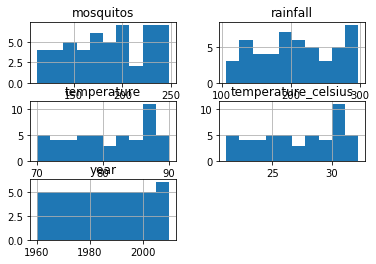

In [12]:
data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92e3df1160>,
      dtype=object)

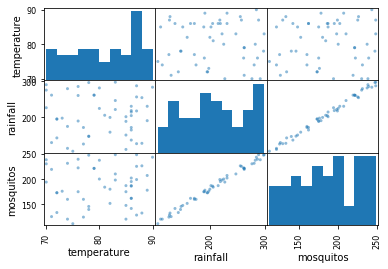

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['temperature','rainfall','mosquitos']])

In [14]:
data.corr()

,year,temperature,rainfall,mosquitos,temperature_celsius
year,1.000000,-0.029602,0.064960,0.047135,-0.029602
temperature,-0.029602,1.000000,-0.015837,0.059395,1.000000
rainfall,0.064960,-0.015837,1.000000,0.995648,-0.015837
mosquitos,0.047135,0.059395,0.995648,1.000000,0.059395
temperature_celsius,-0.029602,1.000000,-0.015837,0.059395,1.000000


In [16]:
import statsmodels.api as sm
import numpy as np

x = data["rainfall"]
y = data["mosquitos"]
X = sm.add_constant(x) # add y-intercept

model = sm.OLS(y, X).fit() # Ordinary Least Squares
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mosquitos   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     5594.
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           3.59e-52
Time:                        17:22:40   Log-Likelihood:                -138.36
No. Observations:                  51   AIC:                             280.7
Df Residuals:                      49   BIC:                             284.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.1598      1.996     20.625      0.000      37.149      45.170
rainfall       0.6959      0.009     74.790      0.000       0.677       0.715
==============================================================================
Omnibus:                        4.504   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                2.135
Skew:                           0.181   Prob(JB):                        0.344
Kurtosis:                       2.065   Cond. No.                         821.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
data.sum(0, skipna=False)

year                   101235.000000
temperature              4100.000000
rainfall                10559.000000
mosquitos                9447.000000
temperature_celsius      1371.111111
dtype: float64

In [ ]:
#  Project
# Import from Excel exam_results.xlsx
# You're the director of undergraduate studies. You have to do a few things.

# You need to give prizes to the five students taking Physics with the top mean marks over all four modules. Which students get the prizes?
# The staff member running the tutor group with the highest mean mark gets a beer. Which group's tutor gets the beer?
# You need to report the mean mark for each course to the faculty. List the four courses by order of mean mark. Plot these on a bar chart so they can understand it.
# Scores above 70% are a 'first'. Scores between 60 and 69% are an 'upper second', between 50 and 59% a 'lower second', between 40 and 49% a 'third', and 39% and below is a fail. For Quantum Mechanics, plot a pie chart showing the number of students who fall in each of these categories.
# Students on the Physics programme pass the year if they score more than 40% on three out of four modules. Otherwise they fail. How many students failed? Loop through the failing students, printing out a personalised statement (imagine that you will code it so Python emails it to them) telling them they've failed.
# Rumour has it the scores for Lab Work have been made up. Create a scatter matrix for the four courses. What does this tell you?
# Do a linear regression analysis to come up with a linear model for the Waves score based on the Relativity score.